**1 - Importing Library's**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2 - Reading File**

In [3]:
df = pd.read_csv('/content/combined_employee_dataset_1.csv')

**3 - Viewing top 4 feature's and row's**

In [4]:
df.head()

,age,years_experience,education_level,department,performance_score,performance_category
0,58,23,High School,Finance,10,Excellent
1,48,39,Bachelor,HR,6,Good
2,34,15,High School,HR,5,Average
3,27,29,PhD,HR,4,Average
4,40,36,PhD,Finance,2,Poor


**4 - Statical Information about the data**
* **Q3 : age ka mean, min, max kya hai?**
* **Q4 : years_experience ka average experience kitna hai?**

In [5]:
df.describe()

,age,years_experience,performance_score
count,791.000000,791.000000,791.000000
mean,39.867257,21.031606,5.495575
std,11.867681,11.467412,2.927766
min,20.000000,1.000000,1.000000
25%,29.000000,11.000000,3.000000
50%,41.000000,22.000000,5.000000
75%,51.000000,32.000000,8.000000
max,59.000000,39.000000,10.000000


* **3 Answer - (mean,min,max) of age feature**    
*               mean = 39.86
*                min = 20.00
*                max = 59.00

* **4 Answer - Average_Experince = 21.031**

* **Q5 : performance_score ka distribution kaisa hai?**

**5 - Viewing Shape of the data**
* **Q1 : Dataset me total rows aur columns kitne hain?**

In [6]:
df.shape

(791, 6)

* **1 Answer - There are...**
*                             *Rows = 791*
*                             *Column = 6*

**6 - Checking for null values**

In [7]:
df.isnull().sum()

,0
age,0
years_experience,0
education_level,0
department,0
performance_score,0
performance_category,0


**7 - Checking for duplicates values**

In [8]:
df.duplicated().sum()

np.int64(3)

**8 - Droping Duplicates**

In [9]:
df.drop_duplicates(inplace=True)

**9 - Viewing Information about the Data**
* **Q2 : Kaun se columns numeric hain aur kaun se categorical?**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 788 entries, 0 to 790
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   788 non-null    int64 
 1   years_experience      788 non-null    int64 
 2   education_level       788 non-null    object
 3   department            788 non-null    object
 4   performance_score     788 non-null    int64 
 5   performance_category  788 non-null    object
dtypes: int64(3), object(3)
memory usage: 43.1+ KB


* **2 Answer -Check Dtype**

* **Q7 : Department-wise average performance_score kya hai?**

**METHOD 1**
* **Checking average performance by grouping by and mean**

In [11]:
avg_perf = df.groupby('department')['performance_score'].mean()

In [12]:
avg_perf

,performance_score
department,
Finance,5.693548
HR,5.288136
Sales,5.390909
Tech,5.604878


* **7 Answer -**
**Average Performance by Department -**

      **Finance = 5.693**

      **HR = 5.288**

      **Sales = 5.390**

      **Tech = 5.604**

* **Highest Performance was of Finance Department later on followed by ['Tech','Sales','HR'] respectively**

**METHOD 2**
* **Checking average of department and performance_score by BARPLOT**

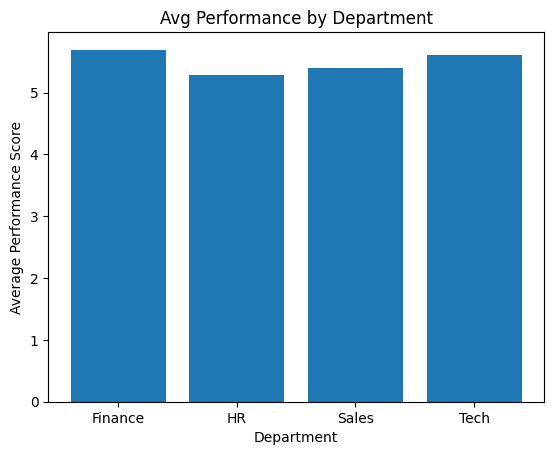

In [13]:
plt.bar(avg_perf.index, avg_perf.values)
plt.xlabel('Department')
plt.ylabel('Average Performance Score')
plt.title('Avg Performance by Department')
plt.show()

* **7 Answer -**
**Highest Performace was of Finance Department = 5.693**

* **Q8 : Education level ke hisaab se performance_score kaise change hota hai?**

* **METHOD 1**
* **Using encoding**

* **Importing LABEL ENCODER for encoing categorical data into numerical**

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
df['education_encoded'] = le.fit_transform(df['education_level'])

* **Creating a new feature to store all numerical columns** (**as per needs**)

In [16]:
num_df = df[['age', 'years_experience', 'performance_score','education_encoded']]

* **Finding the correlation**

In [17]:
corr = num_df.corr()
print(corr)

                        age  years_experience  performance_score  \
age                1.000000          0.026723          -0.000408   
years_experience   0.026723          1.000000           0.045408   
performance_score -0.000408          0.045408           1.000000   
education_encoded -0.006442         -0.010673          -0.059319   

                   education_encoded  
age                        -0.006442  
years_experience           -0.010673  
performance_score          -0.059319  
education_encoded           1.000000  


* **Answer 8 -** **We can see there is a (-ve) relation between education_level and performance***

* **

* **Q18 : Numeric columns ka correlation heatmap banao**
* **METHOD 2**
* **18 Answer - Using Heatmap**

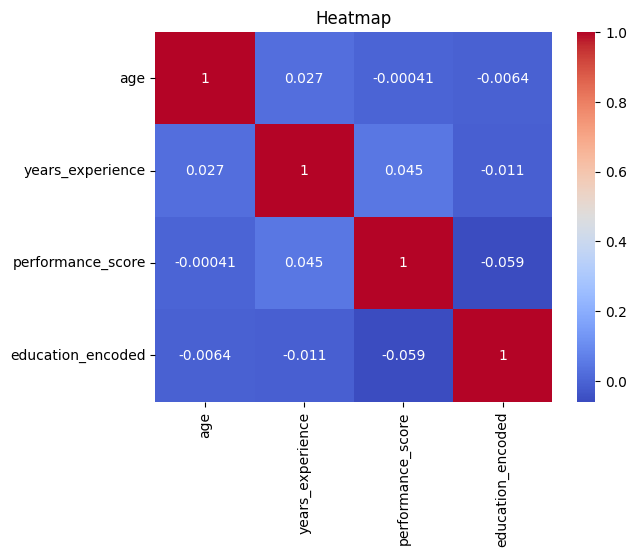

In [18]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap')
plt.show()

* **Answer 8 -** **We can see there is a (-ve) relation between education_level and performance***

* **METHOD 3**
* **Using lineplot**

<Axes: xlabel='education_level', ylabel='performance_score'>

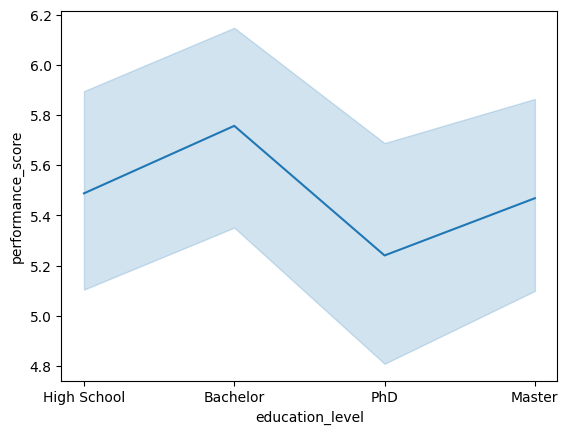

In [19]:
sns.lineplot(x='education_level', y='performance_score', data=df)

* **Answer 8 -** **We can see there is a (-ve) relation between education_level and performance and BACHELOR performance was the highest followed by High School***

* **METHOD 4**
* **Using barplot**

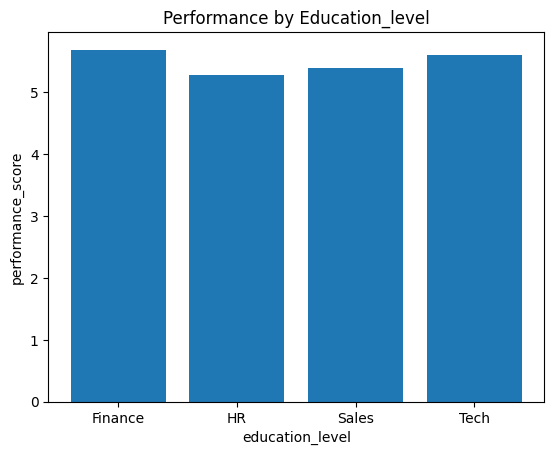

In [20]:
plt.bar(avg_perf.index, avg_perf.values)
plt.xlabel('education_level')
plt.ylabel('performance_score')
plt.title('Performance by Education_level')
plt.show()

* **Answer 8 -** **We can see there is a (-ve) relation between education_level and performance and BACHELOR performance was the highest followed by High School***

In [21]:
avg_perf = df.groupby('education_level')['performance_score'].mean()
avg_perf

,performance_score
education_level,
Bachelor,5.757426
High School,5.488152
Master,5.468750
PhD,5.240437


* **8 Answer** **# 'Highest Performing Category Is Bachelor = 5.757 followed by High School = 5.488 '**

* **Q9 : Kya age badhne se performance_score increase hota hai ya decrease?**

<Axes: xlabel='performance_score', ylabel='age'>

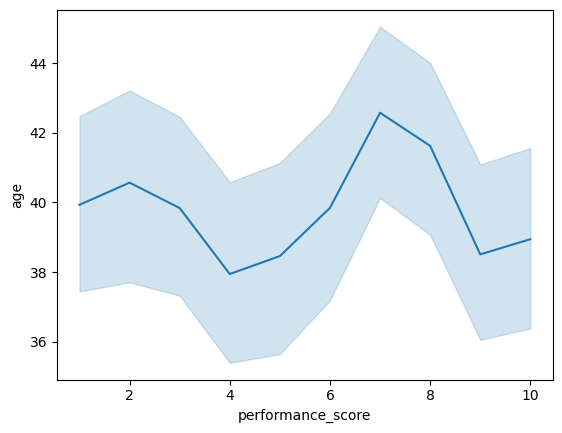

In [22]:
sns.lineplot(x='performance_score', y='age', data=df)

In [23]:
df[['age','performance_score']].corr()

,age,performance_score
age,1.000000,-0.000408
performance_score,-0.000408,1.000000


* **9 Answer** - **This Show that there is no increment of Performance Score by age** `

* **Q10 : Years of experience vs performance_score ka relation kya hai?**

In [24]:
df[['years_experience','performance_score']].corr()

,years_experience,performance_score
years_experience,1.000000,0.045408
performance_score,0.045408,1.000000


* **10 Answer** **There is no Relation between 'year_experience' and 'performance_score'**

* **Viewing Data**

In [25]:
df.head()

,age,years_experience,education_level,department,performance_score,performance_category,education_encoded
0,58,23,High School,Finance,10,Excellent,1
1,48,39,Bachelor,HR,6,Good,0
2,34,15,High School,HR,5,Average,1
3,27,29,PhD,HR,4,Average,3
4,40,36,PhD,Finance,2,Poor,3


* **Q11 : Kaunsa department me sabse zyada “Excellent” performance hai?**

In [26]:
excellent_count = df[df['performance_category'] == 'Excellent']['department'].value_counts()
excellent_count

,count
department,
Finance,25
Tech,23
Sales,23
HR,16


* **11 Answer** **'It shows that Finance Department have more Excellent = 25 '**

* **Q12 : Kya PhD holders ka performance Bachelor/High School se better hai?**

<Axes: xlabel='education_level', ylabel='performance_score'>

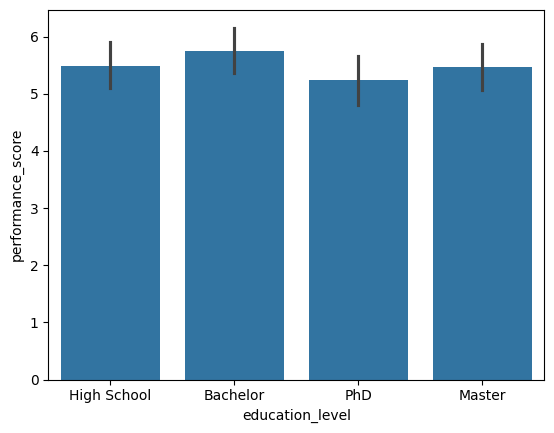

In [27]:
sns.barplot(x='education_level', y='performance_score', data=df)

* **12 Answer** **This shows that Bachelor's and High School performance score was more then PhD**

In [28]:
avg_perf_by_edu = df.groupby('education_level')['performance_score'].mean()
avg_perf_by_edu

,performance_score
education_level,
Bachelor,5.757426
High School,5.488152
Master,5.468750
PhD,5.240437


* **12 Answer - It shows that Bachelor's/High school's performance is (5.75 and 5.48 respectively) which is better than PhD which is (5.24)**

* **Q13 : age ka distribution dikhao (histplot)**

* **13 Answer -**

<Axes: xlabel='age', ylabel='Count'>

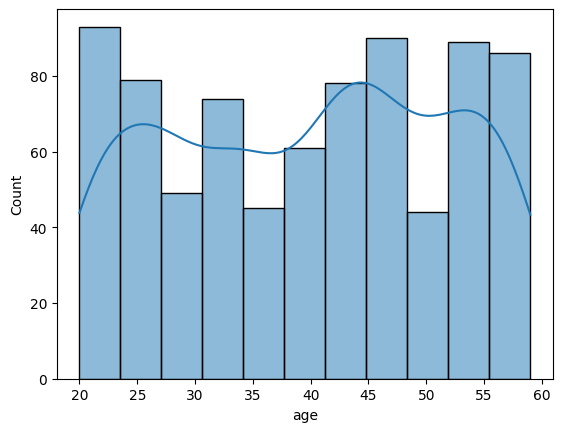

In [29]:
sns.histplot(df['age'] , kde=True)

* **Q14 : years_experience vs performance_score ka scatter plot banao**

* **14 Answer -**

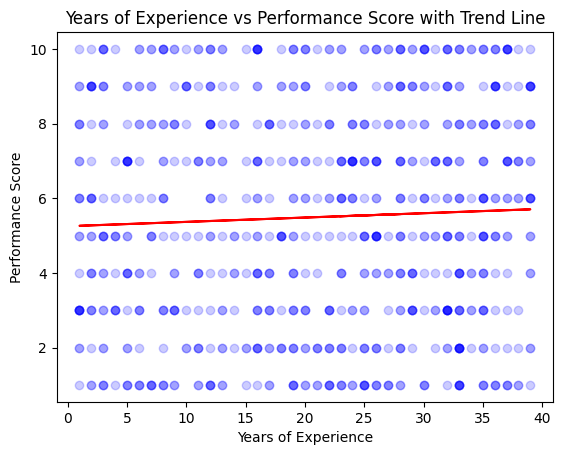

In [30]:
x = df['years_experience']
y = df['performance_score']

# Fit a simple linear regression line
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, color='blue', alpha=0.2)
plt.plot(x, m*x + b, color='red')  # regression line
plt.xlabel('Years of Experience')
plt.ylabel('Performance Score')
plt.title('Years of Experience vs Performance Score with Trend Line')
plt.show()

* **Q15 : department vs performance_score ka barplot banao**

* **15 Answer -**

<Axes: xlabel='department', ylabel='performance_score'>

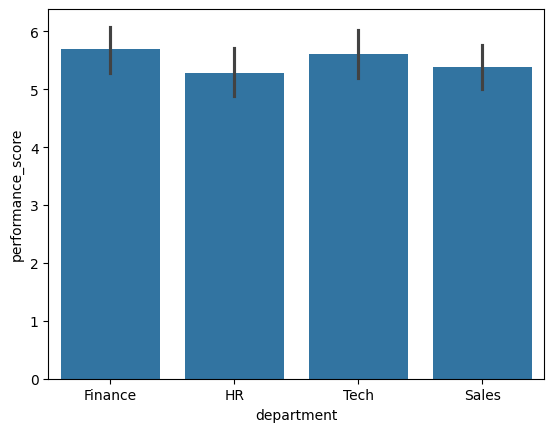

In [31]:
sns.barplot(x='department', y='performance_score', data=df)

* **Q16 : education_level vs performance_score ka boxplot banao**

* **16 Answer -**

<Axes: xlabel='education_level', ylabel='performance_score'>

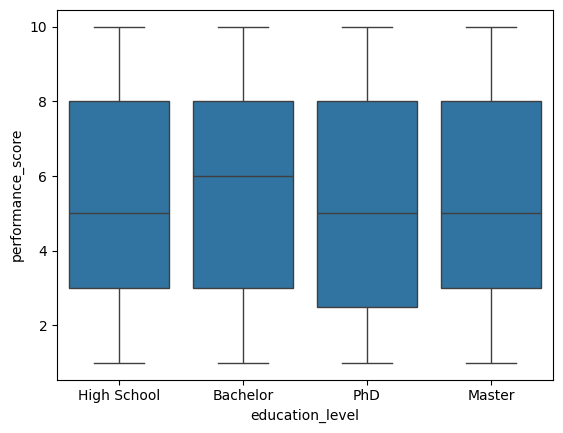

In [32]:
sns.boxplot(x='education_level', y='performance_score', data=df)

* **Q17 : performance_category ka countplot banao**

* **17 Answer -**

<Axes: xlabel='performance_category', ylabel='count'>

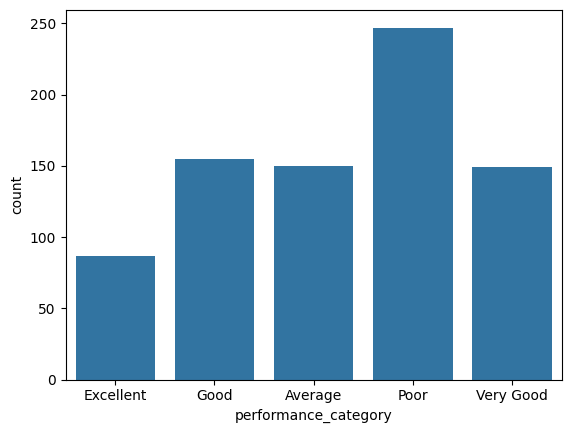

In [33]:
sns.countplot(x='performance_category', data=df)

* **Q19 : age ke basis par Age_Group banao (Young / Mid / Senior)**

* **19 Answer -**

In [34]:
Age_Group = []
for age in df['age']:
  if age <= 30:
    Age_Group.append('Young')
  elif age >30 or age <= 50:
    Age_Group.append('Mid')
  else:
    Age_Group.append('Senior')

In [35]:
df['Age_Group'] = Age_Group

In [36]:
df.head()

,age,years_experience,education_level,department,performance_score,performance_category,education_encoded,Age_Group
0,58,23,High School,Finance,10,Excellent,1,Mid
1,48,39,Bachelor,HR,6,Good,0,Mid
2,34,15,High School,HR,5,Average,1,Mid
3,27,29,PhD,HR,4,Average,3,Young
4,40,36,PhD,Finance,2,Poor,3,Mid


In [37]:
spread_perf = df.groupby('education_level')['performance_score'].std()
print(spread_perf)

education_level
Bachelor       2.926219
High School    2.933160
Master         2.828254
PhD            3.010440
Name: performance_score, dtype: float64


In [38]:
avg_perf = df.groupby('education_level')['performance_score'].mean()
print(avg_perf)

education_level
Bachelor       5.757426
High School    5.488152
Master         5.468750
PhD            5.240437
Name: performance_score, dtype: float64


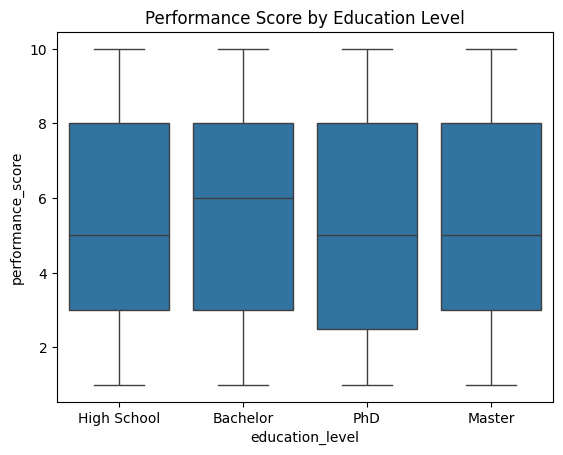

In [39]:
sns.boxplot(x='education_level', y='performance_score', data=df)
plt.title('Performance Score by Education Level')
plt.show()

* **Q20  : years_experience ke basis par Experience_Level banao**
* **

* **20 Answer -**

In [40]:
Experience_Level = []
for years_experience in df['years_experience']:
  if years_experience <= 10:
    Experience_Level.append('Low')
  elif years_experience >10 or years_experience <= 20:
    Experience_Level.append('Medium')
  elif years_experience >20 or years_experience <= 30:
    Experience_Level.append('High')
  else:
    Experience_Level.append('Expert')
df['Experience_Level'] = Experience_Level

* **Q21 : performance_score ko use karke High_Performer (Yes/No) column banao**

* **21 Answer -**

In [41]:
High_Performer = []
for performance_score in df['performance_score']:
  if performance_score <= 6:
    High_Performer.append('NO')
  else:
    High_Performer.append('YES')
df['High_Performer'] = High_Performer

* **Q22 : age aur years_experience ka ratio feature banao**

* **22 Answer -**

In [42]:
df['ratio_feature'] = df['age']/df['years_experience']

In [43]:
df.ratio_feature.head()

,ratio_feature
0,2.521739
1,1.230769
2,2.266667
3,0.931034
4,1.111111


In [44]:
df.head()

,age,years_experience,education_level,department,performance_score,performance_category,education_encoded,Age_Group,Experience_Level,High_Performer,ratio_feature
0,58,23,High School,Finance,10,Excellent,1,Mid,Medium,YES,2.521739
1,48,39,Bachelor,HR,6,Good,0,Mid,Medium,NO,1.230769
2,34,15,High School,HR,5,Average,1,Mid,Medium,NO,2.266667
3,27,29,PhD,HR,4,Average,3,Young,Medium,NO,0.931034
4,40,36,PhD,Finance,2,Poor,3,Mid,Medium,NO,1.111111


* **Q23 : HR ko kaunse department pe sabse zyada focus karna chahiye?**

* **23 Answer -**

In [45]:
df.groupby('department')['performance_category'].value_counts()

department  performance_category
Finance     Poor                    54
            Good                    37
            Average                 35
            Very Good               35
            Excellent               25
HR          Poor                    58
            Average                 37
            Good                    35
            Very Good               31
            Excellent               16
Sales       Poor                    75
            Average                 42
            Very Good               42
            Good                    38
            Excellent               23
Tech        Poor                    60
            Good                    45
            Very Good               41
            Average                 36
            Excellent               23
Name: count, dtype: int64

In [46]:
low_perf_counts = df[df['High_Performer'] != 'YES'].groupby('department').value_counts()
print(low_perf_counts)

department  age  years_experience  education_level  performance_score  performance_category  education_encoded  Age_Group  Experience_Level  High_Performer  ratio_feature
Finance     20   2                 Master           6                  Good                  2                  Young      Low               NO              10.000000        1
                 7                 Master           1                  Poor                  2                  Young      Low               NO              2.857143         1
                 30                PhD              1                  Poor                  3                  Young      Medium            NO              0.666667         1
                 33                PhD              3                  Poor                  3                  Young      Medium            NO              0.606061         1
            21   17                Master           2                  Poor                  2                  Young      Me

* **Q24 : Kaunse education level ke employees consistently better perform kar rahe hain?**

In [47]:
df.groupby('education_level')['performance_score'].agg(['mean', 'std'])

,mean,std
education_level,,
Bachelor,5.757426,2.926219
High School,5.488152,2.933160
Master,5.468750,2.828254
PhD,5.240437,3.010440


* **24 Answer -Bachelor degree holders performing (highest mean), and Master’s holders are more consistent performer(lowest std)**

* **Q25 : Kya high experience hamesha high performance deta hai?**

* **25 Answer -**

In [48]:
if ((df['Experience_Level'] == 'High') & (df['High_Performer'] == 'YES')).any():
  print('Yes')
else:
  print('No')

No


In [49]:
# Correlation between years_experience and performance_score
df[['years_experience', 'performance_score']].corr()

,years_experience,performance_score
years_experience,1.000000,0.045408
performance_score,0.045408,1.000000


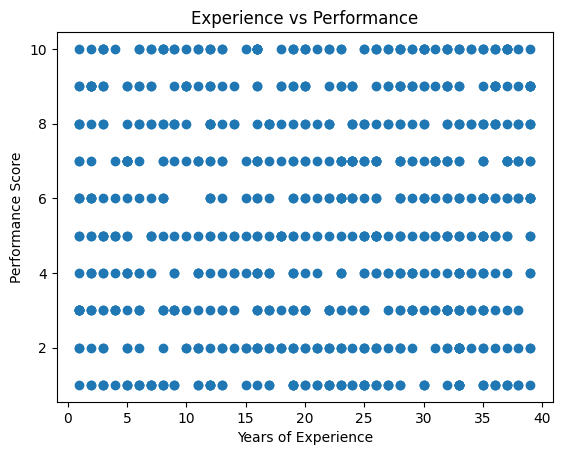

In [50]:
plt.scatter(df['years_experience'], df['performance_score'])
plt.xlabel('Years of Experience')
plt.ylabel('Performance Score')
plt.title('Experience vs Performance')
plt.show()

* **Q26 : Kaunse age group me Poor performance zyada dikhti hai?**

In [51]:
df.groupby('Age_Group')['performance_category'].value_counts()

Age_Group  performance_category
Mid        Poor                    179
           Good                    116
           Very Good               111
           Average                 100
           Excellent                61
Young      Poor                     68
           Average                  50
           Good                     39
           Very Good                38
           Excellent                26
Name: count, dtype: int64

* **26 Answer - This shows that *# Mid #* age group have more counts of Poor performer**

* **Q27 : Performance improve karne ke liye 2 HR suggestions do (data ke base par)**

In [55]:
df.groupby('education_level')['performance_score'].agg(['mean', 'std'])

,mean,std
education_level,,
Bachelor,5.757426,2.926219
High School,5.488152,2.933160
Master,5.468750,2.828254
PhD,5.240437,3.010440


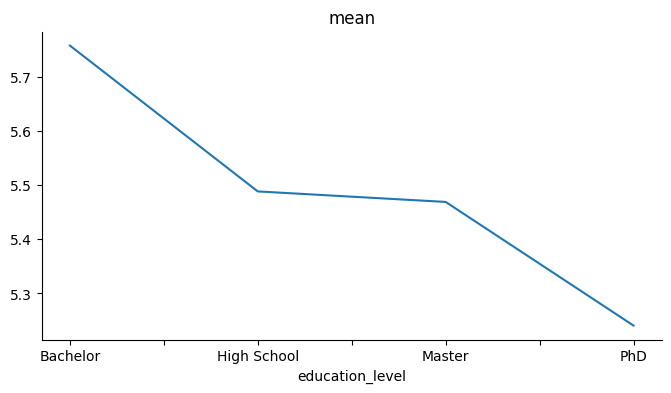

In [54]:
from matplotlib import pyplot as plt
_df_3['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

* *#1*  - **As we can see clearly Bachelor's are consistently performing average high performance and lowest distribution so need to arrange a meeting and training for PhD holder's under Bachelor's employees because they are performing with low average and having with high distribution which need to be low for better results and high performance**

* #2 - **Need to train High School employees because they are also performing consistently low distribution but also having a low average performance results they also need a buddy up or a training section under Bachelor's employees**